<a href="https://colab.research.google.com/github/davidmuna/InstaDeep-Enzyme-Classification/blob/main/InstaDeep_Enzyme_Classification_Submission_DMuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

InstaDeep Enzyme Classification Challenge

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Can you predict the class of an enzyme using only its amino acid sequence?

### b) Defining the Metric for Success

My project will be deemed succesful when the following are obtained:
1.  A Precision, Recall, Accuracy and F1 score of >90% in each.  


### c) Understanding the Context 


In the UmojaHack Tunisia hackathon we invited participants to predict the functional class of enzymes called protein kinases based on their amino acid sequences. For this challenge we’re taking it one step further. Given a library of labelled sequences from some well-known organisms, your task is to create a model that can label sequences from new organisms. Each sequence could represent any kind of enzyme - not just kinases.

All enzymes are made of one or more chains of amino acids, which determine their structure, behaviour, and interactions with other enzymes and molecules. That means it should be possible to predict the protein’s function and behaviour given just the amino acid sequence.

A model able to perform this task would have many applications. In addition to enzymes from known organisms (which we have from studying their proteomes), there are vast numbers of metagenomic sequences - this is proteomic sequence data from environmental samples. Being able to quickly annotate them with function using this model (i.e. going beyond simple sequence similarity) would be indispensable. Models developed in the course of this challenge may contribute to furthering the understanding of the world around us.

### d) Recording the Experimental Design

1.   Reading & Checking the data
2.   Tidying the data
3.   Exploratory Data Analysis
4.   Sampling & Class Balancing
5.   Modelling & Performance Tuning
6.   Evaluation
7.   Recommendations

### e) Data Relevance



## 2. Reading the Data

In [ ]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/InstaDeep Enzyme Classification Challenge/"

Mounted at /content/drive
SampleSubmission.csv  SampleSubmission.gsheet  Test.csv  Train.csv


In [ ]:
# Loading our data
train = pd.read_csv("/content/drive/My Drive/InstaDeep Enzyme Classification Challenge/Train.csv")
test = pd.read_csv("/content/drive/My Drive/InstaDeep Enzyme Classification Challenge/Test.csv")

## 3. Data Exploration

In [ ]:
# Determining the no. of records in our dataset
print(train.shape)
print(test.shape)

(858777, 4)
(253146, 3)


In [ ]:
# Previewing the top 3 records of our train dataset
train.head(3)

,SEQUENCE_ID,SEQUENCE,CREATURE,LABEL
0,00011UBJ,MPWQELSITVPHEYVEPISYLFGRYGKGVSTELAGNGQVLLRTYLT...,creature9,class11
1,0001HZ3P,MGKLVIGSRGSELALWQANHIKERLKKECLIESEIQIVKTKGDKIL...,creature3,class13
2,0003NJDO,MFIVAVLMLAFLIFVHELGHFTIARICGVKVEVFSIGFGKKLCFFK...,creature3,class16


In [ ]:
# Previewing the bottom 3 records of our train dataset
train.tail(3)

,SEQUENCE_ID,SEQUENCE,CREATURE,LABEL
858774,ZZZTY2QU,MEQEICVIGFSGGQDSTTLAVWAKKRFKKVCLVGFDYAQKHSVELE...,creature3,class8
858775,ZZZVSLL1,DRQYTAKADSVARRSCQTALYHIAEALVRWMAPIMSFTADEIWGYL...,creature2,class5
858776,ZZZYBLCE,MLIRGGTVVTADGERKADVLIRDEKVAEVREGIAGDADVIDATGLL...,creature9,class4


In [ ]:
# Checking column datatypes
print("train ########################\n",train.dtypes)
print("test ########################\n",test.dtypes)

train ########################
 SEQUENCE_ID    object
SEQUENCE       object
CREATURE       object
LABEL          object
dtype: object
test ########################
 SEQUENCE_ID    object
SEQUENCE       object
CREATURE       object
dtype: object


In [ ]:
# Datatypes in test data
test.dtypes.value_counts()

object    3
dtype: int64

#### Observation

All data types are objects.


## 5. Data Preparation & Cleaning

In [ ]:
# Standardising column names to lower case and removing trailing spaces if any
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '')
test.columns = test.columns.str.strip().str.lower().str.replace(' ', '')

In [ ]:
# Checking for Missing Records
train.isna().sum()

sequence_id    0
sequence       0
creature       0
label          0
dtype: int64

In [ ]:
# Checking for duplicates in sequence
train['sequence'].duplicated().sum()

42077

In [ ]:
# Checking for duplicates sequence_id
train['sequence_id'].duplicated().sum()

0

In [ ]:
# Checking for Anomalies by identifying unique values in categorical columns
cat_cols = train[['sequence_id', 'sequence', 'creature', 'label']]

for column in cat_cols.columns:
  print(column)
  print(cat_cols[column].unique())
  print('\n')

sequence_id
['00011UBJ' '0001HZ3P' '0003NJDO' ... 'ZZZTY2QU' 'ZZZVSLL1' 'ZZZYBLCE']


sequence
['MPWQELSITVPHEYVEPISYLFGRYGKGVSTELAGNGQVLLRTYLTTGSRQRMARIDVGVRLVGAIESIGDLIVRELPDDEDWMNSWKSHFKILRVGKRLVIKPTWLELDETIKLDDIVIELDPGIAFGTGYHPTTDTCMQAMEQHITPGMAVLDLGTGSGILAITAMKLGAGKVTALDIDSQAVSAARRNFKRTGISKQIRLGQGSVPHPTAPAAEFDLAVANISARGVVDRCPFILTALKPGALFIASGLLATQKPEVANAVEPLGFSLVSEWPQEEWVTLLYRAPDSPIVASE'
 'MGKLVIGSRGSELALWQANHIKERLKKECLIESEIQIVKTKGDKILDTPLNKIGGKGLFTKELEELLLKGEIDLAVHSLKDVPVVFEKGLDLACITKRADVRDTFLSVKFPDLMSLPEGAKVGTTSLRRSMQLKLKRQDLDTESLRGNVQTRLKKLECGEFDAIILAEAGLCRLNIQGAKYRKAFSVEEMIPSMGQGALGVEMLKNHKHFATLQKLNDEESAFCCRLEREFIKGLNGGCQIPIGVHASLMGDRVKIQAVLGLPNGKEVITKEKQGDKTKAFDLIQELLEEFLQSGAKEILEKAQLF'
 'MFIVAVLMLAFLIFVHELGHFTIARICGVKVEVFSIGFGKKLCFFKLFGTQFALSLIPLGGYVKLKGMDKEEDGTNETADDSYAQKSPFQKLWILFGGAFFNFLFAILVYFFLALSGEKVLLPIIGGLDKNALEAGLLKGDKILSINHEKIASFREIRSVVARARGELVLEIERNNQILEKRLTPKIVAVISESNDPNEMIRYKIIGIKPDMQKTGIVSYSLIQAFKQALSRFKEGVVLIVDSLRRLIMGSASVKELSGVIGIVGALSHANSLSMLLLFGAFLSINLGILNLL

#### Observation
*   The 42,077 duplicates in sequence remain since they have unique sequence_id.
*   It appears there're no anomalies in our data as well.




## 6. Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution Classes in Train')

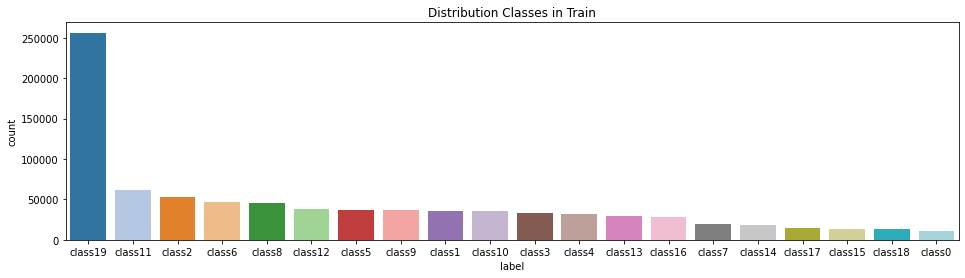

In [ ]:
# Viewing the distribution of the 20 classes in Train using a countplot

# Libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Setting the figure size and plotting
plt.figure(figsize=(16,4))
ax = sns.countplot(x="label", data=train, palette="tab20", order = train['label'].value_counts().index)
plt.title("Distribution Classes in Train")

#### Observation
*   Our classes are imbalanced and have to be balanced before training. 
*   Class 19 and Class 0 have are the majorityt and minority classes respectively.




Text(0.5, 1.0, 'Sequence Distribution of Creatures in Train')

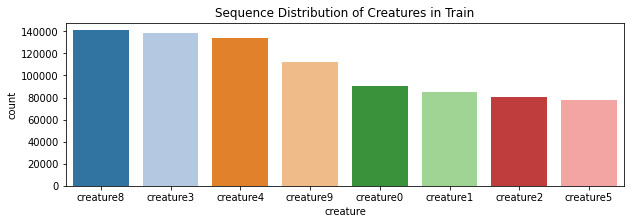

In [ ]:
# Viewing sequence distribution of creatures in train
# Setting the figure size and plotting
plt.figure(figsize=(10,3))
ax = sns.countplot(x="creature", data=train, palette="tab20", order = train['creature'].value_counts().index)
plt.title("Sequence Distribution of Creatures in Train")

Text(0.5, 1.0, 'Sequence Distribution of Creatures in Test')

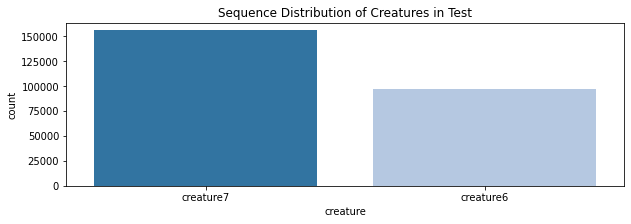

In [ ]:
# Viewing sequence distribution of creatures in test
# Setting the figure size and plotting
plt.figure(figsize=(10,3))
ax = sns.countplot(x="creature", data=test, palette="tab20")
plt.title("Sequence Distribution of Creatures in Test")

It is clear that the Test set contains sequences for creatures 7 and 6 which are not seen in the Train data. 

In [ ]:
# Finding the creature that appears most in class19
creatures_majority = train[train['label']== "class19"].groupby('label')['creature'].value_counts().sort_values(ascending=False)
creatures_majority

# Returns creature4

label    creature 
class19  creature4    133851
         creature8     24810
         creature9     19887
         creature3     18307
         creature0     16339
         creature1     14867
         creature2     14227
         creature5     13985
Name: creature, dtype: int64

In [ ]:
# Finding the creature that appears most in class0
creatures_majority0 = train[train['label']== "class0"].groupby('label')['creature'].value_counts().sort_values(ascending=False)
creatures_majority0

# Returns creature8

label   creature 
class0  creature8    2493
        creature9    1988
        creature3    1593
        creature1    1457
        creature0    1275
        creature2    1170
        creature5    1133
Name: creature, dtype: int64

In [ ]:
# Looking at statistics for sequence length in train data
train['sequence'].map(lambda x: len(x)).describe()

count    858777.000000
mean        407.550355
std         211.880784
min          16.000000
25%         263.000000
50%         381.000000
75%         481.000000
max        1234.000000
Name: sequence, dtype: float64

In [ ]:
# Looking at statistics for sequence length in test data
test['sequence'].map(lambda x: len(x)).describe()

count    253146.000000
mean        379.370261
std         214.976543
min          19.000000
25%         232.000000
50%         339.000000
75%         474.000000
max        1234.000000
Name: sequence, dtype: float64

In [ ]:
# Getting length of sequence in train and test data.
train['seq_char_count']= train['sequence'].apply(lambda x: len(x))
test['seq_char_count']= test['sequence'].apply(lambda x: len(x))

In [ ]:
# Creating a function for plotting a distribution plot of sequence character counts in train and test data

def plot_seq_count(df, data_name):
  sns.distplot(df['seq_char_count'].values)
  plt.title(f'Sequence Character Count: {data_name}')
  plt.grid(True)

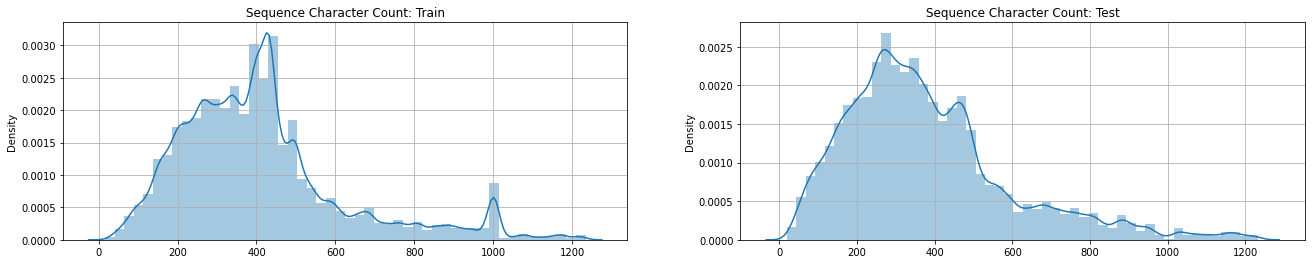

In [ ]:
# Plotting distributions of train and test sequence character counts

plt.subplot(1, 2, 1)
plot_seq_count(train, 'Train')

plt.subplot(1, 2, 2)
plot_seq_count(test, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

Most sequences in Train and Test have character counts in the range of approximately 100-600 with a few going into the thousands.

## Sampling

 Stratified sampling is the best method since our data had well over 800,000 records and this would take more time while performing our analysis. Sampling fraction chosen is 5% of the data so we can retain the exact proportions of classes from the main dataset, in the sample.

### Stratified Sampling

We perform stratified sampling for computational reasons since the train data is quite large. Stratified sampling is best suited since it retains same proportions of classes in the sample as was present in the original data.

In [ ]:
# Checking Value Counts for classes before stratified sampling
train['label'].value_counts().sort_values(ascending=False)

class19    256273
class11     62087
class2      52784
class6      46636
class8      45052
class12     37866
class5      36916
class9      36666
class1      35987
class10     35438
class3      32719
class4      32301
class13     29631
class16     28414
class7      19286
class14     17792
class17     14923
class15     13967
class18     12930
class0      11109
Name: label, dtype: int64

In [ ]:
# Creating a stratified sample of our data grouped by label so as to retain the same proportion of classes
# above in our sample

# NB: High sampling fraction produce a wider margin of sampling error. For this reason, a 10% fraction of the population
# is chosen to reduce sampling error.

strat_sample = train.groupby("label", group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.10))

# Exporting stratified sample to csv
strat_sample.to_csv("/content/strat_sample.csv", index = False)

strat_sample['label'].value_counts()

class19    25627
class11     6209
class2      5278
class6      4664
class8      4505
class12     3787
class5      3692
class9      3667
class1      3599
class10     3544
class3      3272
class4      3230
class13     2963
class16     2841
class7      1929
class14     1779
class17     1492
class15     1397
class18     1293
class0      1111
Name: label, dtype: int64

In [ ]:
# Creating a function that gets the unique letter in a sequence and its frequency of occurence

from collections import Counter

def get_code_freq(df, data_name):
  
  df = df.apply(lambda x: " ".join(x))
  
  codes = []  # initiating a blank list
  for i in df: # concatenating all codes
    codes.extend(i)

  codes_dict = Counter(codes)
  codes_dict.pop(' ') # removing white space
  
  print(f'Codes: {data_name}')
  print(f'Total unique codes: {len(codes_dict.keys())}')

  df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
  return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]

In [ ]:
# Finding the frequency for each code/letter(amino acid) in each sequence by calling above function. 
# NB:
# The twenty amino acids (that make up proteins)each have assigned to them ;
# Three-letters (can be upper or lower case) and one-letter code (upper case.


# train code sequence using the stratified sample because the train data is too large and crashes the RAM.
train_code_freq = get_code_freq(strat_sample['sequence'], 'Train')
train_code_freq

Codes: Train
Total unique codes: 24


,Code,Freq
0,L,3518178
1,A,3099795
2,G,2636759
3,V,2407333
4,E,2355664
5,I,2253459
6,K,2077056
7,D,1949990
8,R,1949621
9,S,1836687


In [ ]:
# test code sequence
test_code_freq = get_code_freq(test['sequence'], 'Train')
test_code_freq

Codes: Train
Total unique codes: 22


,Code,Freq
0,L,10305566
1,A,9796485
2,G,7315191
3,V,6659944
4,E,5978780
5,R,5927049
6,D,5447698
7,S,5176983
8,I,5127870
9,T,4790625


In [ ]:
# Creating a function that plots a histogram distribution of the codes in train and test above

def plot_code_freq(df, data_name):
  
  plt.title(f'Code Frequency: {data_name}')
  sns.barplot(x='Code', y='Freq', data=df)

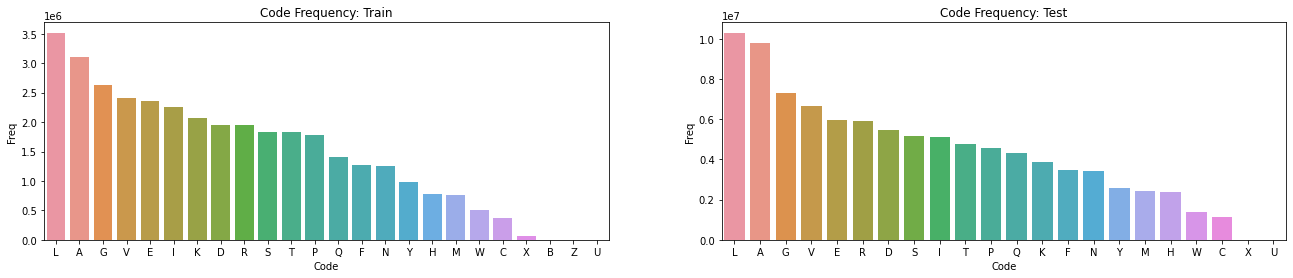

In [ ]:
# Plotting

plt.subplot(1, 2, 1)
plot_code_freq(train_code_freq, 'Train')

plt.subplot(1, 2, 2)
plot_code_freq(test_code_freq, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

More info on the twenty Amino Acids: [Link](http://www.cryst.bbk.ac.uk/education/AminoAcid/the_twenty.html)

#### Observations

Most common amino acid letter codes in decreasing order are L,A,G,V and E in both train and test data and the least ones are X,B,Z and U. We therefore consider the most common 20 amino acids for encoding our sequence.

However, Test data does not contain B and Z. These are the unseen data points present in Train but absent in Test.


## 6. Text preprocessing of the sequence column by creating a K-Mers function.

In [ ]:
# Creating a function to create all possible overlapping k-mers of specified length from any sequence length
# by converting the sequence strings into k-mer words of fixed length (3/Triamer word) 
# Length of 3 was found to be optimum manually.

def getKmers(sequence, size=3):
  return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
# Converting the Train data sequences into short overlapping k-mers of legth 6 into new kmers column and dropping the sequence column

strat_sample['words'] = strat_sample.apply(lambda x: getKmers(x['sequence']), axis=1)
strat_sample = strat_sample.drop('sequence', axis=1)

In [ ]:
# Previewing the k-mer words
strat_sample.head(5)

,sequence_id,creature,label,seq_char_count,words
538964,MMUEQAFQ,creature8,class0,337,"[msi, sin, ini, nia, iai, ain, ing, ngf, gfg, ..."
457032,J71S2J3J,creature3,class0,449,"[mel, ele, let, eth, thl, hls, lsk, sky, kyf, ..."
388314,GBBBGA5C,creature5,class0,346,"[mat, ata, taa, aar, ark, rka, kap, apa, pak, ..."
570238,NXUH26I1,creature0,class0,481,"[mti, tiw, iwe, wen, ena, nam, amq, mqy, qyq, ..."
654304,RFUGU8EE,creature8,class0,410,"[mel, elq, lql, qlf, lfg, fgi, gin, inh, nhk, ..."


In [ ]:
# Converting the lists of k-mer texts for each sequence into string sentences of words that the count vectorizer can use.

# Train data
train_texts = list(strat_sample['words'])
for item in range(len(train_texts)):
    train_texts[item] = ' '.join(train_texts[item])

In [ ]:
# Creating BAG of WORDS model using CountVectorizer() using NLP
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(5,5))

In [ ]:
# Creating Independent and Dependent variables. 
y_data = strat_sample['label']
X = cv.fit_transform(train_texts)

In [ ]:
# Viewing the shape of X, y_data

print(X.shape)
print(y_data.shape)

(85879, 11508091)
(85879,)


In [ ]:
# Splitting the data into the training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y_data, test_size = 0.20, random_state=32)

In [ ]:
### Multinomial Naive Bayes Classifier ###
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  class0  class1  class10  class11  ...  class6  class7  class8  class9
Actual                                       ...                                
class0          0       0        0        0  ...       0       0       0       1
class1          0       0        1        0  ...       1       0       1       2
class10         0       0        0        0  ...       1       1       0       1
class11         0       0        1        2  ...       0       1       1       0
class12         2       1        1        1  ...       0       1       1       1
class13         1       2        3        0  ...       0       1       0       0
class14         0       0        0        0  ...       0       0       0       0
class15         0       0        1        2  ...       0       0       0       0
class16         0       0        1        1  ...       0       0       0       1
class17         0       0        0        0  ...       1       1       1       1
class18   

#### Improving Model Performance

In [ ]:
# Dealing with class imbalance using SMOTE() technikque
from imblearn.over_sampling import SMOTE

smote = SMOTE() 
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [ ]:
# Checking class distribution again

from collections import Counter

print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_sm))

Before SMOTE :  Counter({'class19': 20476, 'class11': 4977, 'class2': 4224, 'class6': 3741, 'class8': 3600, 'class12': 3023, 'class5': 2957, 'class9': 2936, 'class1': 2858, 'class10': 2820, 'class3': 2641, 'class4': 2558, 'class13': 2393, 'class16': 2291, 'class7': 1540, 'class14': 1439, 'class17': 1182, 'class15': 1113, 'class18': 1035, 'class0': 899})
After SMOTE :  Counter({'class19': 25627, 'class17': 23064, 'class7': 23064, 'class13': 23064, 'class15': 23064, 'class16': 23064, 'class0': 23064, 'class14': 23064, 'class18': 23064, 'class5': 20502, 'class9': 20502, 'class3': 20502, 'class1': 20502, 'class4': 20502, 'class12': 20502, 'class10': 20502, 'class6': 15376, 'class2': 15376, 'class8': 15376, 'class11': 10250})


In [ ]:
classifier = MultinomialNB(alpha=2.0)
classifier.fit(X_train_sm, y_train_sm)

MultinomialNB(alpha=2.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  class0  class1  class10  class11  ...  class6  class7  class8  class9
Actual                                       ...                                
class0          0       0        0        0  ...       0       0       0       1
class1          0       0        1        2  ...       1       0       1       2
class10         0       0        0        1  ...       1       1       0       1
class11         0       0        1        3  ...       0       1       1       0
class12         0       1        1        4  ...       0       1       2       1
class13         1       2        3        2  ...       0       1       0       0
class14         0       0        0        0  ...       0       0       0       0
class15         0       0        1        2  ...       0       0       0       0
class16         0       0        1        1  ...       0       0       0       1
class17         0       0        0        1  ...       1       1       1       1
class18   

The above model performs well on data points seen during training. Lets see how it performs on data points from the Test set which were not present during training. We first make same transormations from train data to test data.

In [ ]:
#  Converting the Test data sequences into short overlapping k-mers of legth 6 into new kmers column and dropping the sequence column

test['words'] = test.apply(lambda x: getKmers(x['sequence']), axis=1)
test = test.drop('sequence', axis=1)

In [ ]:
# Test data
test_texts = list(test['words'])
for item in range(len(test_texts)):
    test_texts[item] = ' '.join(test_texts[item])

In [ ]:
test_data = cv.transform(test_texts)

In [ ]:
# Checking to see the dimensions are the same as X_test
X_test.shape, test_data.shape

((17176, 11508091), (253146, 11508091))

In [ ]:
# Making predictions on Test data provided
test_data_pred = classifier.predict(test_data)

In [ ]:
# Saving submision file 

ss = pd.DataFrame({
    'SEQUENCE_ID':test['sequence_id'],
    'LABEL': test_data_pred
})

# Exporting output to csv
ss.to_csv("/content/Submission.csv", index = False)
ss.head()

,SEQUENCE_ID,LABEL
0,000LRRAI,class6
1,000O8L4W,class10
2,000UKB5J,class10
3,00111SLH,class2
4,001ELB0A,class2
